In [17]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb 
import scipy as sp
import IPython
import sklearn
import mglearn

X.shape: (26, 2)


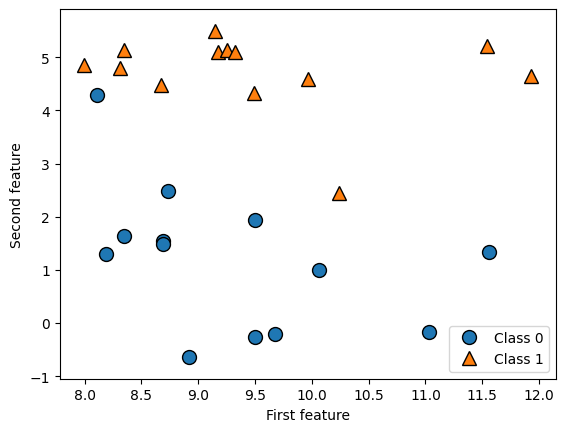

In [18]:
## generate dataset
X,y = mglearn.datasets.make_forge()
## plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shape: {}'.format(X.shape))

Text(0, 0.5, 'Target')

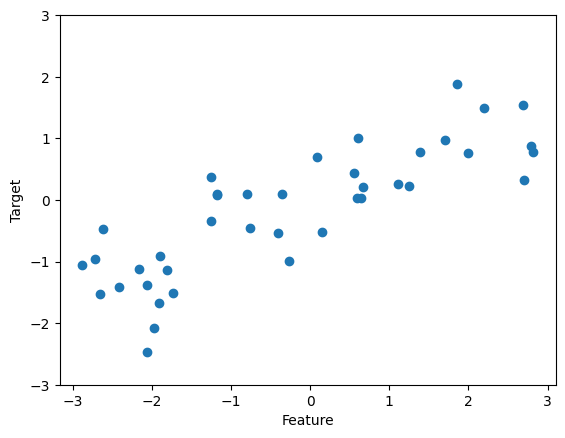

In [19]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys(): \n{}'.format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [21]:
print('Shape of cancer data: {}'.format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [22]:
print('Sample counts per class:\n{}'.format(
        {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [23]:
print('Feature names:\n{}'.format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [24]:
from sklearn.datasets import load_boston
boston = load_boston()
print('Data shape: {}'.format(boston.data.shape))

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [26]:
X,y = mglearn.datasets.load_extended_boston()
print('X.shape: {}'.format(X.shape))

RemoteDisconnected: Remote end closed connection without response

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [ ]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X ,y, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf.fit(X_train, y_train)
print('Test set predictions: {}'.format(clf.predict(X_test)))

In [ ]:
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
 # the fit method returns the object self, so we can instantiate
 # and fit in one line
 clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{} neighbor(s)".format(n_neighbors))
 ax.set_xlabel("feature 0")
 ax.set_ylabel("feature 1")
 axes[0].legend(loc=3)

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()



In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

In [ ]:
print('Test set predictions:\n{}'.format(reg.predict(X_test)))

In [ ]:
print('Test set R^2: {:.2f}'.format(reg.score(X_test, y_test)))

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
## create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    ## make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score:{:.2f}".format(
        n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model predictions', 'Training data/target',
                'Test data/target'], loc='best')

## Linear Models

In [ ]:
mglearn.plots.plot_linear_regression_wave()

In [ ]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

In [ ]:
print('Traning set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

In [ ]:
X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print('Traning set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

In [ ]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge10.score(X_test, y_test)))

In [ ]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge01.score(X_test, y_test)))

In [ ]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='Linear Regression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

In [ ]:
mglearn.plots.plot_ridge_n_samples()

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_ != 0)))

In [ ]:
# we increase the default setting of 'max_iter',
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Traning set score: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso001.coef_ != 0)))

In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

In [ ]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('Coefficient index')
plt.ylabel('Coeeficient magnitude')

## Linear models for classification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print('Traning set score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg.score(X_test, y_test)))